Multinomial Naive Bayes

In [1]:
#Importing the needed libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#Importing libraries for comparison

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import load_iris, make_classification

In [99]:
#Creating the function for Naive Bayes Classifier

def fcnNaiveBayes(X, y, X_test, intAlpha = 0.1):
    
    yUniqueClass, yCountForEachUnqiueClass = np.unique(y, return_counts=True)
    intNumberOfSamples, intNumberOfFeatures = X.shape
    intNumberOfClass = len(yUniqueClass)
    yProbForEachClass = yCountForEachUnqiueClass / float(intNumberOfSamples)
    xUniqueFeatures = [np.unique(x) for x in X.T]
    
    xProbForEachFeatureEachClass = []
    xCountForEachFeatureEachClass = []
    
    for intClassIterator in range(0, intNumberOfClass):
        xProbForEachFeature = []
        xCountForEachFeature = []
        for intFeatureIterator in range(0, intNumberOfFeatures):
            xUniqueFeatureForEachClass = X[:, intFeatureIterator][y == intClassIterator].reshape(-1,1) == xUniqueFeatures[intFeatureIterator]
            xProbForEachFeature.append((xUniqueFeatureForEachClass.sum(axis=0) + intAlpha) / (len(xUniqueFeatureForEachClass) + (intNumberOfFeatures * intAlpha)))
            xCountForEachFeature.append(len(xUniqueFeatureForEachClass))
        xProbForEachFeatureEachClass.append(xProbForEachFeature)
        xCountForEachFeatureEachClass.append(xCountForEachFeature)
        
    yPredicted = np.zeros(X_test.shape[0])
    yProbability = np.zeros(X_test.shape[0])
    for intSampleIndex, testSample in enumerate(X_test):
        yPosteriorForEachSample = np.zeros(intNumberOfClass)
        for intClassIndex, intClassLabel in enumerate(yUniqueClass):
            yPrior = yProbForEachClass[intClassIndex]
            yConditionalProb = 0
            for intFeatureIndex, intFeatureValue in enumerate(testSample):
                if intFeatureValue in xUniqueFeatures[intFeatureIndex]:
                    intIndex = list(xUniqueFeatures[intFeatureIndex]).index(intFeatureValue)
                    yConditionalProb += np.log(xProbForEachFeatureEachClass[intClassIndex][intFeatureIndex][intIndex])
                else:
                    yUnseenProb = 1 + intAlpha / (xCountForEachFeatureEachClass[intClassIndex][intFeatureIndex] + (intNumberOfFeatures * intAlpha))
                    yConditionalProb += np.log(yUnseenProb)
            yPosteriorForEachSample[intClassIndex] = yConditionalProb + yPrior
        yPredicted[intSampleIndex] = yUniqueClass[np.argmax(yPosteriorForEachSample)]
        yProbability[intSampleIndex] = np.exp(np.max(yPosteriorForEachSample))
        
    return yPredicted, yProbability

def fcnCalculateAccuracy(y_predicted, y_test):
    return np.mean(y_predicted == y_test)

In [91]:
#Working on Toy Dataset

data = load_iris()
X = data['data']
Y = data['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=2)

In [100]:
#Using the Naive Bayes Classifier

Y_Pred, Y_Prob = fcnNaiveBayes(X_train, Y_train, X_test, 0.01)
Accuracy = fcnCalculateAccuracy(Y_Pred, Y_test)

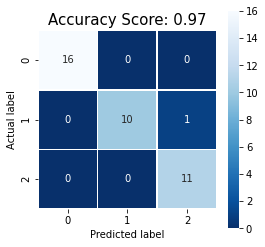

In [101]:
#Confusion Matrix 

cm = metrics.confusion_matrix(Y_test, Y_Pred)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(Accuracy, 2))
plt.title(all_sample_title, size = 15);

In [72]:
#Comparison with sklearn library

NBC2 = MultinomialNB()
NBC2.fit(X_train, Y_train)
Y_Predicted =  NBC2.predict(X_test)
score = metrics.accuracy_score(Y_test, Y_Predicted)
score

0.9736842105263158